# Tutorial: Regresión Logística en Python

## Introducción
La regresión logística es un algoritmo de clasificación ampliamente utilizado en machine learning. Aunque su nombre sugiere que es un método de regresión, en realidad se utiliza para problemas de clasificación binaria o multiclase. En este tutorial, implementaremos una regresión logística utilizando la librería `scikit-learn` y seguiremos todas las etapas del pipeline de machine learning.

## Pipeline de Machine Learning
El pipeline de machine learning consta de las siguientes etapas:
1. **Generación del Dataset**: Crear un dataset sintético para clasificación.
2. **Preprocesamiento**: Preparar los datos para el modelo.
3. **División de Datos**: Separar los datos en conjuntos de entrenamiento y prueba.
4. **Entrenamiento del Modelo**: Ajustar el modelo a los datos de entrenamiento.
5. **Evaluación del Modelo**: Medir el rendimiento del modelo con datos de prueba.
6. **Predicción**: Usar el modelo entrenado para clasificar nuevos datos.

## 1. Generación del Dataset
Creamos un dataset sintético bien balanceado para clasificación binaria utilizando `make_classification` de `scikit-learn`. Además, imprimimos parte del dataset para inspeccionarlo.

   Característica 1  Característica 2  Etiqueta
0         -0.872929          0.013042         1
1          1.312935          2.770534         1
2          2.340428          2.420996         1
3          2.294548         -0.404380         1
4          0.944105          0.477241         1


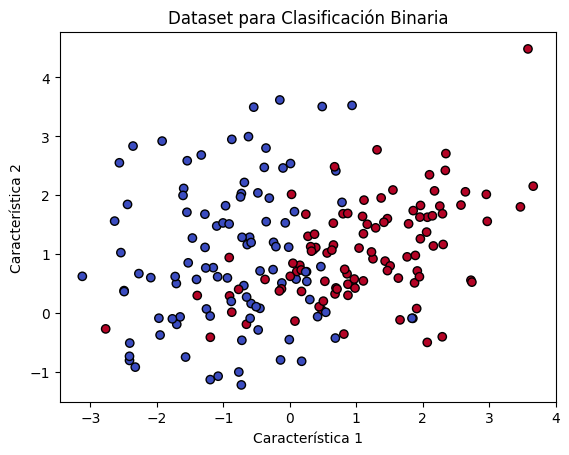

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generar dataset sintético
X, y = make_classification(
    n_samples=200,  # Número de muestras
    n_features=2,   # Número de características
    n_informative=2, # Características informativas
    n_redundant=0,  # Características redundantes
    n_clusters_per_class=1, # Clusters por clase
    random_state=42 # Semilla para reproducibilidad
)

# Crear un DataFrame para inspeccionar los datos
df = pd.DataFrame(X, columns=['Característica 1', 'Característica 2'])
df['Etiqueta'] = y
print(df.head())  # Mostrar las primeras filas del dataset

# Graficar el dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Dataset para Clasificación Binaria')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

## 2. Preprocesamiento
En este caso, no es necesario escalar los datos porque `make_classification` genera datos ya normalizados. Sin embargo, en problemas reales, es común escalar las características.

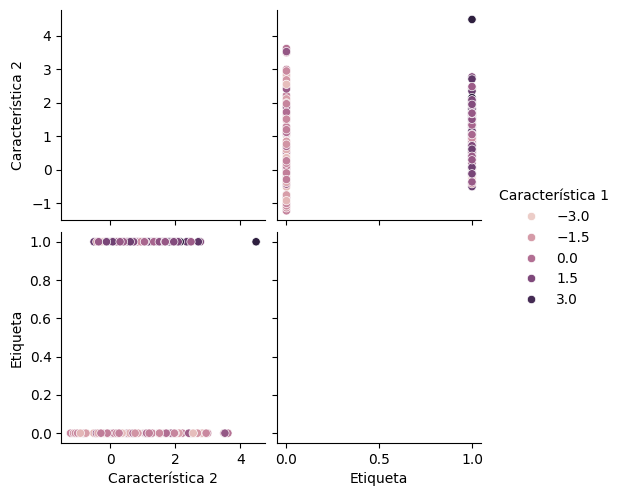

In [5]:
# Crear Pairplot
sns.pairplot(df, hue="Característica 1", diag_kind="kde")

# Mostrar gráfico
plt.show()

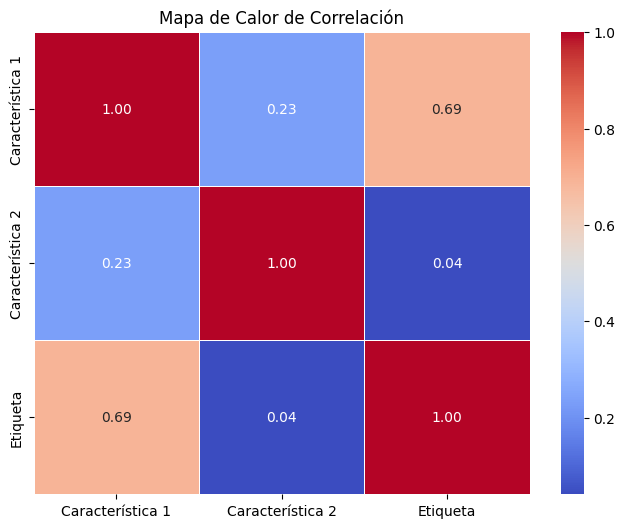

In [6]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Generar el heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Configuración del título
plt.title("Mapa de Calor de Correlación")
plt.show()

## 3. División de Datos
Dividimos el dataset en conjuntos de entrenamiento y prueba utilizando `train_test_split`. Esta función toma los siguientes parámetros:
- `X`: Las características del dataset.
- `y`: Las etiquetas del dataset.
- `test_size`: El porcentaje de datos que se utilizarán para prueba (en este caso, 20%).
- `random_state`: Semilla para reproducibilidad.

La función devuelve cuatro arrays:
- `X_train`: Características de entrenamiento.
- `X_test`: Características de prueba.
- `y_train`: Etiquetas de entrenamiento.
- `y_test`: Etiquetas de prueba.

In [10]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')

Tamaño del conjunto de entrenamiento: 160 muestras
Tamaño del conjunto de prueba: 40 muestras


## 4. Entrenamiento del Modelo
### Regresión Logística
La regresión logística modela la probabilidad de que una muestra pertenezca a una clase utilizando la **función sigmoide**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
donde $z = w^T x + b$ es el producto punto entre los pesos $w$ y las características $x$ más el sesgo $b$.

#### Función de Verosimilitud (Likelihood)
La verosimilitud es la probabilidad de observar los datos dados los parámetros del modelo:
$$
L(w) = \prod_{i=1}^n \sigma(z_i)^{y_i} (1 - \sigma(z_i))^{1 - y_i}
$$

#### Log-Verosimilitud (Log-Likelihood)
Para simplificar los cálculos, se utiliza el logaritmo de la verosimilitud:
$$
\log L(w) = \sum_{i=1}^n \left[ y_i \log(\sigma(z_i)) + (1 - y_i) \log(1 - \sigma(z_i)) \right]
$$

#### Entropía Cruzada (Cross-Entropy)
La función de pérdida en regresión logística es la entropía cruzada, que es el negativo de la log-verosimilitud:
$$
\text{Cross-Entropy} = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\sigma(z_i)) + (1 - y_i) \log(1 - \sigma(z_i)) \right]
$$

#### Gráfica de la Función de Pérdida
A continuación, graficamos las dos componentes de la función de pérdida:
- `-log(h_theta)` si `y = 1`.
- `-(1 - log(h_theta))` si `y = 0`.

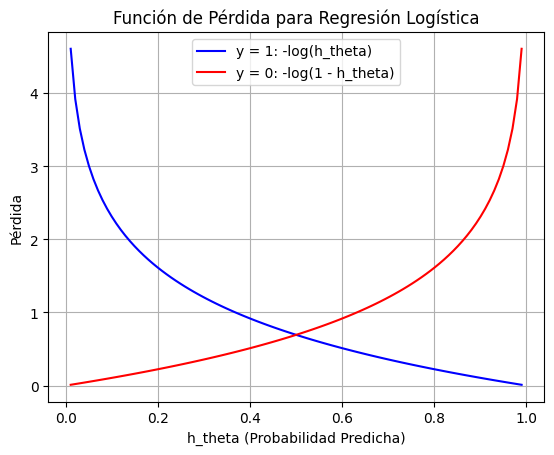

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Valores de h_theta (probabilidades predichas)
h_theta = np.linspace(0.01, 0.99, 100)

# Pérdida cuando y = 1
loss_y1 = -np.log(h_theta)

# Pérdida cuando y = 0
loss_y0 = -np.log(1 - h_theta)

# Graficar ambas funciones
plt.plot(h_theta, loss_y1, label='y = 1: -log(h_theta)', color='blue')
plt.plot(h_theta, loss_y0, label='y = 0: -log(1 - h_theta)', color='red')
plt.title('Función de Pérdida para Regresión Logística')
plt.xlabel('h_theta (Probabilidad Predicha)')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()

## 4.1 scikit-learn: logistic regression

Para el rntrenamiento del Modelo, utilizamos `LogisticRegression` de `scikit-learn` para entrenar el modelo. Parámetros más importantes:
 
   - **`penalty`**: Tipo de regularización (`l1`, `l2`, `elasticnet`, `none`).
   - **`C`**: Parámetro de regularización inverso (valores pequeños indican mayor regularización).
   - **`solver`**: Algoritmo de optimización (`liblinear`, `newton-cg`, `lbfgs`, etc.).
   - **`max_iter`**: Número máximo de iteraciones para converger.

### 4.1.1 Algoritmos de Optimización en `scikit-learn`
`scikit-learn` ofrece varios algoritmos de optimización para entrenar modelos de regresión logística. Los más comunes son:

- **`liblinear`**: Adecuado para datasets pequeños. Utiliza un método de optimización basado en coordenadas descendentes.
- **`lbfgs`**: Adecuado para datasets medianos. Utiliza el método de Broyden-Fletcher-Goldfarb-Shanno (BFGS) con aproximación de memoria limitada.
- **`newton-cg`**: Utiliza el método de Newton para optimización. Adecuado para datasets medianos.
- **`sag`** y **`saga`**: Utilizan el descenso de gradiente estocástico promedio (Stochastic Average Gradient). Adecuados para datasets grandes.

Estos algoritmos minimizan la función de pérdida (entropía cruzada) para encontrar los valores óptimos de los pesos \(w\) y el sesgo \(b\).

In [13]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)

# Entrenar el modelo
model.fit(X_train, y_train)

# Coeficientes del modelo
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

Coeficientes: [[ 1.71124662 -0.53974951]]
Intercepto: [0.46078716]


## 5. Evaluación del Modelo
Evaluamos el modelo utilizando la métrica de **exactitud (accuracy)** y la **matriz de confusión**.

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

Exactitud del modelo: 0.88


### 5.1 Matriz de Confusión
La matriz de confusión es una herramienta que permite visualizar el rendimiento de un algoritmo de clasificación. Para un problema de clasificación binaria, la matriz de confusión tiene la siguiente forma:

|                     | Predicción Positiva | Predicción Negativa |
|---------------------|---------------------|---------------------|
| **Actual Positivo** | Verdaderos Positivos (VP) | Falsos Negativos (FN) |
| **Actual Negativo** | Falsos Positivos (FP) | Verdaderos Negativos (VN) |

#### Fórmulas para Calcular los Valores de la Matriz de Confusión
1. **Verdaderos Positivos (VP)**: Número de muestras que son positivas y fueron correctamente clasificadas como positivas.
   $$
   VP = \sum_{i=1}^n \mathbb{I}(y_i = 1 \land \hat{y}_i = 1)
   $$
2. **Falsos Positivos (FP)**: Número de muestras que son negativas pero fueron incorrectamente clasificadas como positivas.
   $$
   FP = \sum_{i=1}^n \mathbb{I}(y_i = 0 \land \hat{y}_i = 1)
   $$
3. **Verdaderos Negativos (VN)**: Número de muestras que son negativas y fueron correctamente clasificadas como negativas.
  $$
   VN = \sum_{i=1}^n \mathbb{I}(y_i = 0 \land \hat{y}_i = 0)
   $$
4. **Falsos Negativos (FN)**: Número de muestras que son positivas pero fueron incorrectamente clasificadas como negativas.
   $$
   FN = \sum_{i=1}^n \mathbb{I}(y_i = 1 \land \hat{y}_i = 0)
  $$

Donde \(\mathbb{I}\) es la función indicadora que devuelve 1 si la condición es verdadera y 0 en caso contrario.

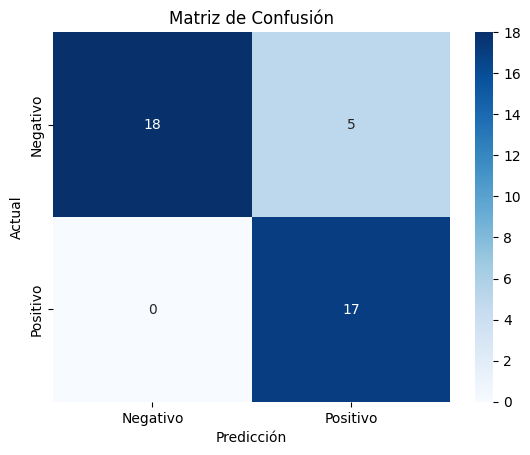

In [15]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

## 6. Predicción
Finalmente, usamos el modelo entrenado para clasificar nuevos datos.

In [16]:
# Nuevos datos para clasificar
new_data = [[1.5, -0.5], [0.5, 1.5]]

# Predecir las clases
predictions = model.predict(new_data)
print(f'Predicciones: {predictions}')

Predicciones: [1 1]


## Conclusión
- La regresión logística es un método eficaz para problemas de clasificación binaria.
- La función de pérdida logística es convexa, lo que garantiza la convergencia del algoritmo de optimización.
- La matriz de confusión es una herramienta poderosa para entender el rendimiento del modelo en términos de predicciones correctas e incorrectas.